## 4.9 Task

### Part 2

# Contents

    1. Import Libraries
    2. Import Dataframe
    3. Histogram of "order_hour_of_day" and Describe Its Insights
    4. Bar Chart of the “loyalty_flag” Column and Interpret Its Distribution
    5. Analyze Differences in Expenditure by Hour of Day Using a Line Chart
    6. Line Chart Exploring the Connection Between Age and Number of Dependents and Describe Its Insights
    7. Scatterplot of Age Versus Income to Explore the Relationship Between Age and Spending Power
    8. Exporting visualisations

#### 1. Import Libraries

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### 2. Import Dataframe

In [2]:
# establishing a path

path = r'/Users/vickyczada/Library/CloudStorage/OneDrive-Personal/Documents/Career Foundry/Data Immersion/05-2025 Instacart Basket Analysis'

In [3]:
# importing dataframe

df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [4]:
# check dataframe

df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,busiest_day,First Name,last_name,Gender,state,Age,date_joined,number_of_dependents,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Regularly busy,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Regularly busy,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Regularly busy,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Regularly busy,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Regularly busy,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### 3. Histogram of "order_hour_of_day" and Describe Its Insights

3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

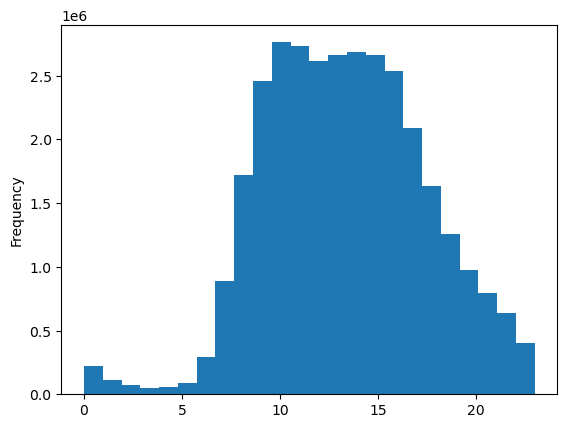

In [5]:
hist = df_merged['order_hour_of_day'].plot.hist(bins = 24)

Based on this histogram the busiest hours of the day for orders are between 8am and 4pm. And the least orders are place between midnight and 5am. 

### 4. Bar Chart of the “loyalty_flag” Column and Interpret Its Distribution

4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

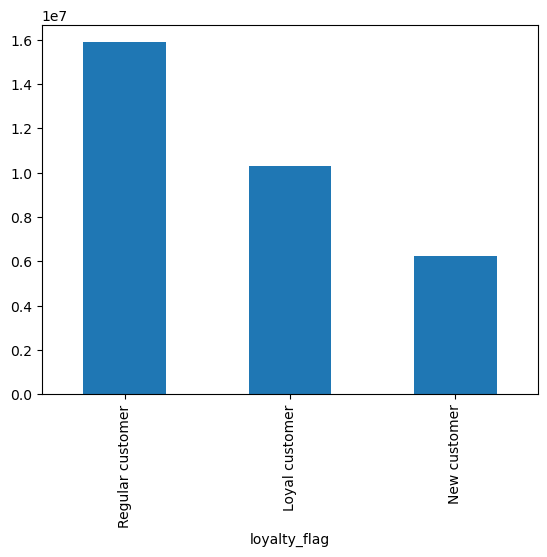

In [6]:
# creating a bar chart for 'loyalty_flag'

bar = df_merged['loyalty_flag'].value_counts().plot.bar()

### 5. Analyze Differences in Expenditure by Hour of Day Using a Line Chart

5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [7]:
# creating a sample of the dataframe

np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [8]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [9]:
# store 70% of the sample in the dataframe big

big = df_merged[dev]

In [10]:
# store 30% of the sample in the dataframe small

small = df_merged[~dev]

In [11]:
len(df_merged)

32404859

In [12]:
len(big) + len(small)

32404859

In [13]:
df_2 = small[['order_hour_of_day', 'prices']]

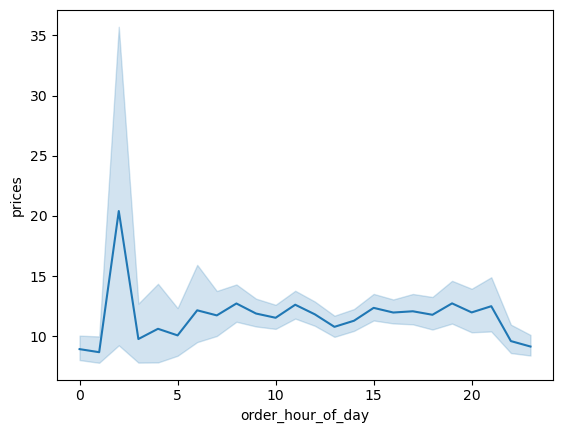

In [14]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

### 6. Line Chart Exploring the Connection Between Age and Number of Dependents and Describe Its Insights

6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [15]:
df_3 = small[['Age', 'number_of_dependents']]

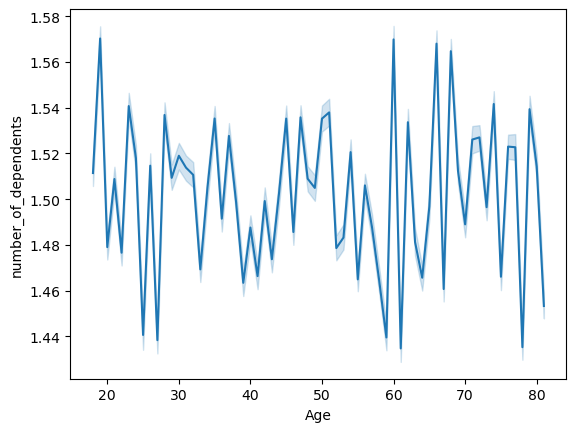

In [16]:
# creating a line chart for age and number of dependents

line_age_num_of_dependents = sns.lineplot(data = df_3, x = 'Age', y = 'number_of_dependents')

Based on this line chart I do not see a clear correlation between 'age' and 'number of dependents'. 

### 7. Scatterplot of Age Versus Income to Explore the Relationship Between Age and Spending Power

7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.m

In [19]:
df_4 = small[['Age', 'income']]

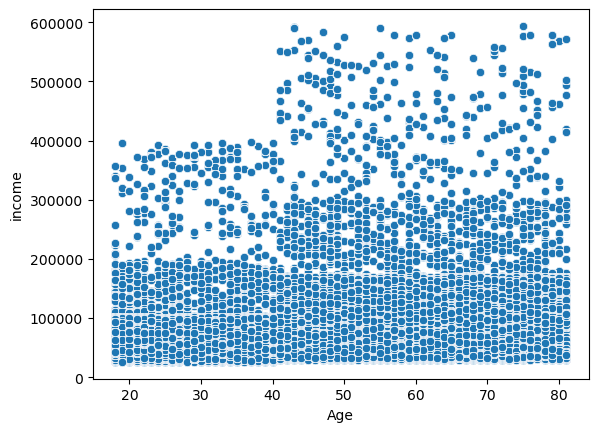

In [20]:
# creating a scatterplot of 'age' and 'income'

scatterplot = sns.scatterplot(data = df_4, x = 'Age', y = 'income')

This scatterplot highlights that there is an increase of income for those customer over the age of 40, going from under 40,000 for customer between 20 to 40 to 40,000 and over for customers aged 40 - 80 years old. 

8. Export your visualizations as “.png” files in your relevant project folder.

In [22]:
#exporting and saving images

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_order_hour_of_day.png'))

In [23]:
#exporting and saving images

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_loyalty_flag.png'))

In [24]:
#exporting and saving images

line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_price_hour_of_day.png'))

In [25]:
#exporting and saving images

line_age_num_of_dependents.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_age_number_of_dependents.png'))

In [26]:
#exporting and saving images

scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'scatterplot_age_income.png'))